In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
BA=pd.read_excel('../shared_data_read_only/Business Account.xlsx')

<function matplotlib.pyplot.show(close=None, block=None)>

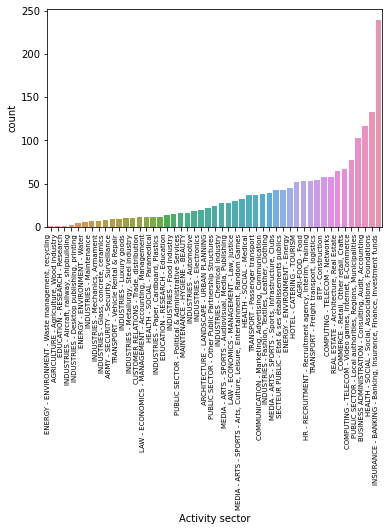

In [42]:

BA['count_sector'] = BA.groupby('Activity sector')['Activity sector'].transform('count')

ax = sns.countplot(x="Activity sector", data=BA.dropna(subset=['Activity sector']).sort_values('count_sector',))

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.tick_params(axis='x', labelsize=7)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

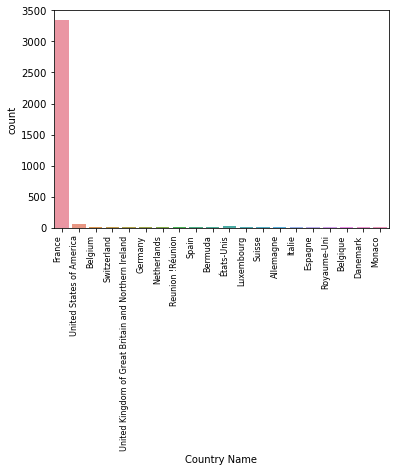

In [36]:
ax = sns.countplot(x="Country Name", data=BA.dropna(subset=['Country Name']))

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.tick_params(axis='x', labelsize=8)
plt.show

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show(close=None, block=None)>

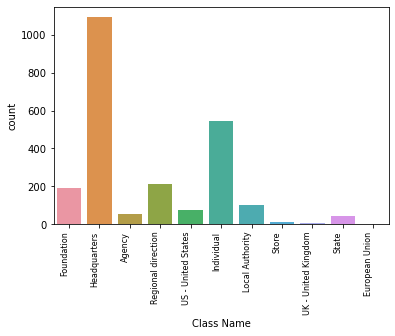

In [37]:
ax = sns.countplot("Class Name", data=BA.dropna(subset=['Class Name']))

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.tick_params(axis='x', labelsize=8)
plt.show